In [1]:
import pandas as pd
df = pd.read_csv('Boston.csv') # csvの読み込み
df.head(2) # 先頭2行の表示

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [3]:
df.shape

(100, 14)

In [4]:
df2 = df.fillna(df.mean( )) # 列ごとの平均値で欠損値の穴埋め

In [5]:
dummy = pd.get_dummies(df2['CRIME'], drop_first = True)
df3 = df2.join(dummy) # df2とdummyを列方向に結合
df3 = df3.drop(['CRIME'], axis = 1) # 元のCRIMEを削除

df3.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [6]:
from sklearn.preprocessing import StandardScaler
 # 中身が整数だと、fit_transformで警告になるので、
# float型に変換（省略可能）
df4 = df3.astype('float')
# 標準化
sc = StandardScaler()
sc_df = sc.fit_transform(df4)

In [7]:
from sklearn.decomposition import PCA

In [8]:
model = PCA(n_components = 2, whiten = True) # モデル作成

In [9]:
# モデルに学習させる
model.fit(sc_df)

PCA(n_components=2, whiten=True)

In [10]:
# 新規の第１軸（第１主成分とも呼ぶ）の固有ベクトル
print( model.components_[0] )
print('-----')
# 新規の第2軸（第2主成分とも呼ぶ）の固有ベクトル
print(model.components_[1])

[-0.2258543   0.35923465  0.04220985  0.3499321  -0.19485285  0.29792086
 -0.29980115  0.30726517  0.32822012  0.16246983 -0.18251937  0.27543839
 -0.2018449   0.03831172 -0.31492126]
-----
[-0.1533893   0.02835867  0.19795373  0.13817925  0.4047141   0.20058802
 -0.29340246 -0.1027543  -0.11546952 -0.34046929  0.05661836 -0.17845386
  0.44390529  0.42253976 -0.27716437]


In [11]:
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.head(3)

,0,1
0,1.490417,-0.680415
1,0.703223,-0.252517
2,-1.403756,-0.613175


In [12]:
new_df.columns = ['PC1', 'PC2']
# 標準化済の既存データ（numpy)をデータフレーム化
df5 = pd.DataFrame(sc_df, columns = df4.columns)
# 2つのデータフレームを列方向に結合
df6 = pd.concat([df5, new_df], axis=1)

In [14]:
df_corr = df6.corr() # 相関係数の計算
df_corr.loc[:'very_low', 'PC1':]

,PC1,PC2
ZN,-0.560802,-0.226097
INDUS,0.891989,0.041801
CHAS,0.104808,0.291786
NOX,0.868891,0.203678
RM,-0.483825,0.596553
AGE,0.739745,0.295669
DIS,-0.744414,-0.432478
RAD,0.762947,-0.151461
TAX,0.814979,-0.170203
PTRATIO,0.403417,-0.501855


In [16]:
# わかりやすいように変数に代入
pc_corr = df_corr.loc[:'very_low', 'PC1':]

pc_corr['PC1'].sort_values(ascending = False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

In [17]:
pc_corr['PC2'].sort_values(ascending = False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

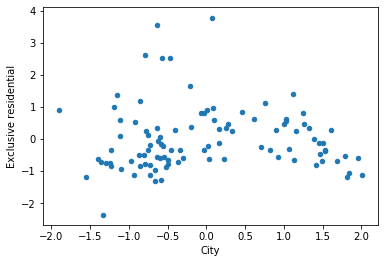

In [15]:
#都市の発展度合いと住環境の良さ
col = ['City', 'Exclusive residential']

new_df.columns = col # 列名の変更

new_df.plot(kind = 'scatter', x = 'City',
    y = 'Exclusive residential') # 散布図

In [18]:
model = PCA(whiten = True)

# 学習と新規軸へのデータの当てはめを一括で行う
tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

In [19]:
model.explained_variance_ratio_ # 寄与率

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

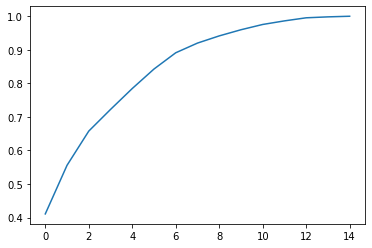

In [20]:
ratio = model.explained_variance_ratio_ # 寄与率のデータ集合

array = [] # 第N列までの累積寄与率を格納するリスト
for i in range(len(ratio)):
# 累積寄与率の計算
    ruiseki = sum(ratio[0:(i+1)])

    array.append(ruiseki) # 累積寄与率の格納

# 第N列の累積寄与率を折れ線グラフ化
pd.Series(array).plot(kind = 'line')

In [21]:
thred = 0.8 # 累積寄与率のしきい値
for i in range(len(array)):
 # 第(i + 1)列の累積寄与率がthredより大きいかチェック
    if array[i] >= thred:
        print(i + 1)
        break

6


In [22]:
model = PCA(n_components=6, whiten = True)

model.fit (sc_df) # 学習

# 元データを新規の列（6列）に当てはめる
new = model.transform(sc_df)

In [23]:
# 主成分分析の結果をデータフレームに変換
col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
new_df2 = pd.DataFrame(new, columns = col)

# データフレームをcsvファイルとして保存
new_df2.to_csv('boston_pca.csv', index = False)

In [24]:
df = pd.read_csv('cinema.csv')
df = df.drop('cinema_id', axis = 1)
# 欠損値補完
df = df.fillna(df.mean())
# 可能なら外れ値の確認もするが
# 今回は割愛

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns = df.columns)

In [27]:
# 累積寄与率を調べる
from sklearn.decomposition import PCA
model = PCA(whiten = True)
model.fit(sc_df)

total = []
for i in model.explained_variance_ratio_:
    if len(total) == 0:
        total.append(i)
    else:
        tmp = total[-1] + i
        total.append(tmp)
total

[0.5401206784462206,
 0.7261760786703706,
 0.8624874337165253,
 0.9677581622696745,
 1.0]

In [28]:
model = PCA(whiten=True, n_components = 3)
model.fit(sc_df)
new = pd.DataFrame(model.transform(sc_df), columns=['pc1',
'pc2', 'pc3'])
new_df = pd.concat([new, sc_df], axis = 1)
cor_df = new_df.corr()
cor_df.loc['pc1':'pc3', 'SNS1':]

,SNS1,SNS2,actor,original,sales
pc1,0.736368,0.598555,0.837999,0.469117,0.936901
pc2,-0.050756,-0.534089,-0.037073,0.800559,0.013415
pc3,-0.531509,0.536704,-0.017275,0.324773,-0.072303
